# Basic information

<li>The owner has been a host since August 2010
<li>The location is lon:151.274506, lat:33.889087
<li>The current review score rating 95.0
<li>Number of reviews 53
<li>Minimum nights 4
<li>The house can accomodate 10 people.
<li>The owner currently charges a cleaning fee of 370
<li>The house has 3 bathrooms, 5 bedrooms, 7 beds.
<li>The house is available for 255 of the next 365 days
<li>The client is verified, and they are a superhost.
<li>The cancelation policy is strict with a 14 days grace period.
<li>The host requires a security deposit of $1,500

Data came from July 2018


In [1]:
# creation of Sample Customer Data later called SCD, hold as dict
from dateutil import parser

SCD_dict = {}
SCD_dict["city"] = "Bondi Beach" 
SCD_dict["longitude"] = 151.274506 
SCD_dict["latitude"] = -33.88907 
SCD_dict["review_score_rating"] = 95 
SCD_dict["number_of_reviews"] = 53 
SCD_dict["minimum_nights"] = 4 
SCD_dict["accommodates"] = 10 
SCD_dict["bathrooms"] = 3 
SCD_dict["bedrooms"] = 5
SCD_dict["beds"] = 7
SCD_dict["security_deposit"] = 1500
SCD_dict["cleaning_fee"] = 370
SCD_dict["property_Type"] = "House"
SCD_dict["room_type"] = "Entire home/apt"
SCD_dict["availability_365"] = 255
SCD_dict["host_identity_verified"] = "t" 
SCD_dict["host_is_superhost"] = "t"
SCD_dict["cancellation_policy"] = "strict_14_with_grace_period"
SCD_dict["host_since"] = parser.parser("01-08-2010") 




In [2]:
## This is simply a bit of importing logic that you don't have ..
## .. to concern yourself with for now. 
import pandas as pd 
import numpy as np 
import os 
from pathlib import Path
import re 
import seaborn as sns 

github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")      
    df = pd.read_csv('datasets/sydney_airbnb.csv')
else:
    print("Be patient: loading from github (2 minutes)")
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print("Done")

Be patient: loading from github (2 minutes)
Done


In [3]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'c

In [4]:
chosen = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 
df = df[chosen]

In [5]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate


In [6]:
df.columns

Index(['price', 'city', 'longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'security_deposit',
       'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'property_type', 'room_type', 'availability_365',
       'host_identity_verified', 'host_is_superhost', 'host_since',
       'cancellation_policy'],
      dtype='object')

In [7]:
df.shape 

(27070, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   27070 non-null  object 
 1   city                    27037 non-null  object 
 2   longitude               27070 non-null  float64
 3   latitude                27070 non-null  float64
 4   review_scores_rating    19512 non-null  float64
 5   number_of_reviews       27070 non-null  int64  
 6   minimum_nights          27070 non-null  int64  
 7   security_deposit        16722 non-null  object 
 8   cleaning_fee            19250 non-null  object 
 9   accommodates            27070 non-null  int64  
 10  bathrooms               27048 non-null  float64
 11  bedrooms                27062 non-null  float64
 12  beds                    27037 non-null  float64
 13  property_type           27070 non-null  object 
 14  room_type               27070 non-null

In [9]:
# Some price values are held as strings, I dont want that, i will convert those to floats using regular expression and some pandas built in function

price_list = ["price", "cleaning_fee", "security_deposit"] #columns holding such values

for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('',x)) if len(x) > 0 else 0)

In [10]:
# changing date from "host since" to datetime wchich also is hold as a string value
df['host_since'] = pd.to_datetime(df['host_since'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   27070 non-null  float64       
 1   city                    27037 non-null  object        
 2   longitude               27070 non-null  float64       
 3   latitude                27070 non-null  float64       
 4   review_scores_rating    19512 non-null  float64       
 5   number_of_reviews       27070 non-null  int64         
 6   minimum_nights          27070 non-null  int64         
 7   security_deposit        27070 non-null  float64       
 8   cleaning_fee            27070 non-null  float64       
 9   accommodates            27070 non-null  int64         
 10  bathrooms               27048 non-null  float64       
 11  bedrooms                27062 non-null  float64       
 12  beds                    27037 non-null  float6

## Data exploration using box plots to check for outliers

<AxesSubplot:ylabel='price'>

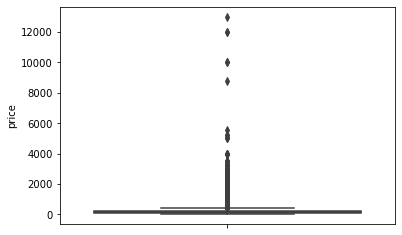

In [16]:
sns.boxplot(y = df['price'])